## Performance Plots

A clean notebook to start using trial by trial data frame to make performance plots for animals across sessions.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from io_utils import *

# settings
%reload_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
 

In [271]:
df = fetch_latest_protocol_data(['R501'])
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
post_anti_df = df[(df['date'] > antibias_working)]

[2022-08-23 12:03:39,036][WARNING]: MySQL server has gone away. Reconnecting to the server.


OperationalError: (2003, "Can't connect to MySQL server on 'datajoint01.pni.princeton.edu' ([Errno 11001] getaddrinfo failed)")

In [323]:
def plot_stage_and_trials(df, ax, title=None):
    title = "Stage & Trials Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, color="darkorange", ax=ax)
    _ = plt.xticks(rotation=45)
    ax.set(ylabel = "trials per session", title=title)

    ax2 = ax.twinx()
    sns.lineplot(data=df.groupby('date').max().stage, drawstyle='steps-post', color="black", ax=ax2)
    ax2.set_yticks(np.arange(1,df['stage'].max() + 1, 1))
    ax2.set(ylabel = "stage number")
    
    ax2.legend(['stage'])


def plot_stage(df, ax, title=None, **kwargs):
    title = "Stage Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().stage, 
                drawstyle='steps-post', ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = plt.yticks(np.arange(1,11, 1))
    _ = ax.set(ylabel = "stage number", title=title)
    sns.despine()

def plot_trials(df, ax, title=None, **kwargs):
    title = "Trial Plot" if title is None else title
    sns.lineplot(data=df.groupby('date').max().trial, 
                ax=ax, **kwargs)

    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel = "trials per session", title=title)
    sns.despine()

def plot_hits(df, ax, title=None, **kwargs):
    title = "Hit Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="hits", 
                 ci=None, ax=ax, **kwargs)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction correct", title=title,ylim=[0,1])
    sns.despine()

def plot_viols(df, ax, title=None, **kwargs):
    title = "Violation Plot" if title is None else title
    sns.lineplot(data=df, x="date", y="violations", 
                ci=None, ax=ax, **kwargs)
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylabel="fraction violation", title=title,ylim=[0,1])
    sns.despine()


def plot_hits_and_viols(df, ax, title=None):
    title = "Hit & Viol Plot" if title is None else title
    
    sns.lineplot(data=df, x="date", y="hits",
                 color='seagreen', ci=None, ax=ax)
    sns.lineplot(data=df, x="date", y="violations", 
                 color='firebrick', ci=None, ax=ax)
    
    _ = plt.xticks(rotation=45)
    ax.legend(['hits', 'viols'])
    _ = ax.set(ylabel="fraction correct | viol", title=title,ylim=[0,1])
    sns.despine()


def plot_pair_performance(df, ax, title=None):
    title = "Pair Perf Plot" if title is None else title

    hue_order = ["3.0, 3.0", "12.0, 12.0", "3.0, 12.0", "12.0, 3.0"]
    palette = ["skyblue", "steelblue", "thistle", "mediumorchid"]
    sns.lineplot(data=df.groupby(['date','sound_pair']).mean(), 
    x = "date", y="hits", hue="sound_pair", hue_order=hue_order, palette=palette)
    
    _ = plt.xticks(rotation=45)
    _ = ax.set(ylim=[0,1], ylabel="fraction correct")
    sns.despine()
    ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)




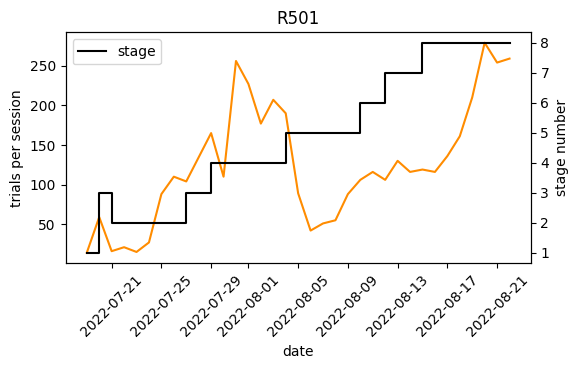

In [267]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_stage_and_trials(df, ax, 'R501')

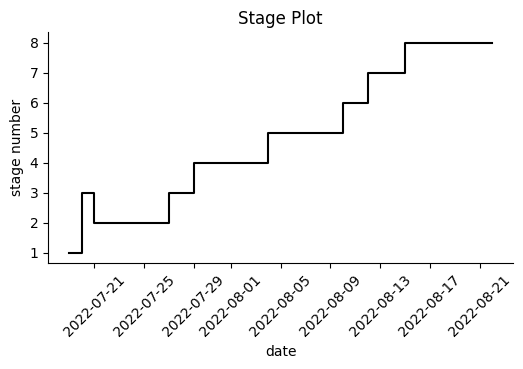

In [269]:
fig, ax = plt.subplots(1,1, figsize=(6,3))

plot_stage(df, ax=ax, color='black')

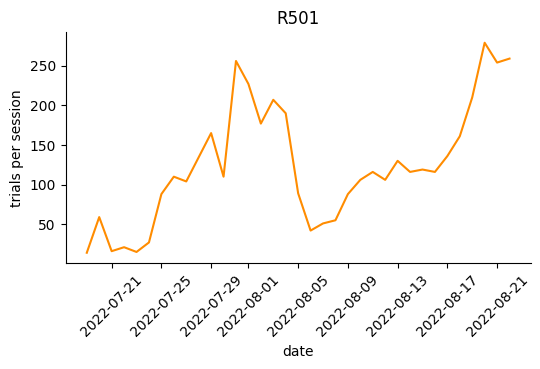

In [247]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_trials(df, ax, title='R501')

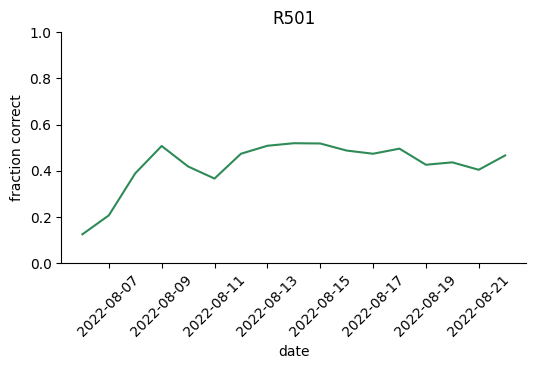

In [251]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_hits(post_anti_df, ax, title='R501', color = 'seagreen')

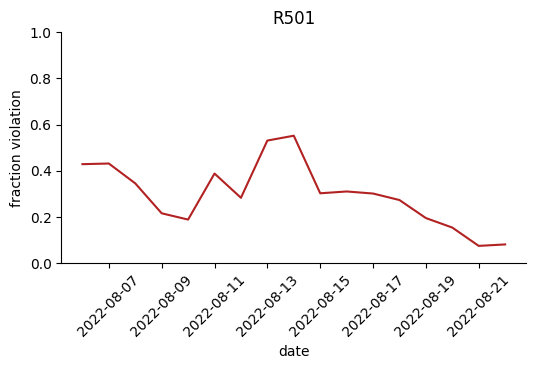

In [260]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_viols(post_anti_df, ax, title='R501', color='firebrick')

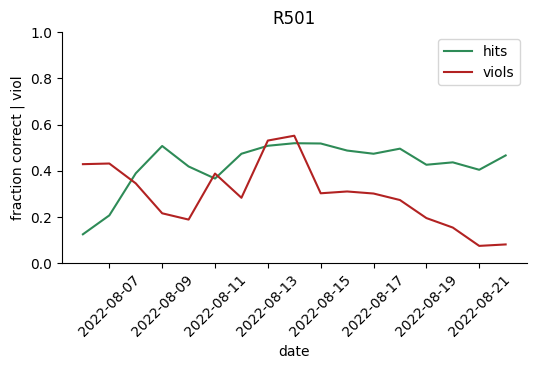

In [232]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_hits_and_viols(post_anti_df, ax, title='R501')

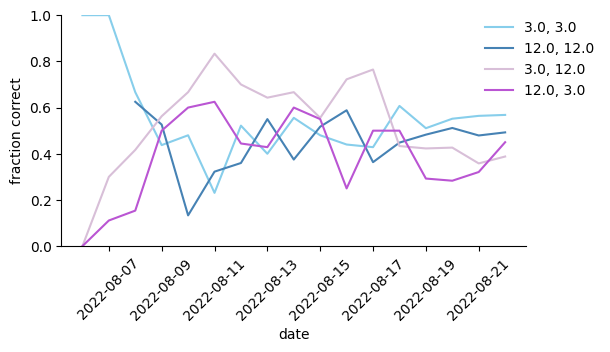

In [270]:
fig, ax = plt.subplots(1,1, figsize=(6,3))



plot_pair_performance(post_anti_df, ax)

In [159]:
d = date.today() - timedelta(days=7)
d

datetime.date(2022, 8, 15)

## Plots across animals

Making these plots for meeting w/ Javier on 8/24


In [274]:
df_all = fetch_latest_protocol_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
df_antib = post_anti_df = df_all[(df_all['date'] > antibias_working)]

[2022-08-23 12:05:15,418][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 34 sessions for R500
fetched 36 sessions for R501
fetched 37 sessions for R502
fetched 35 sessions for R503
fetched 37 sessions for R600


#### Trials 

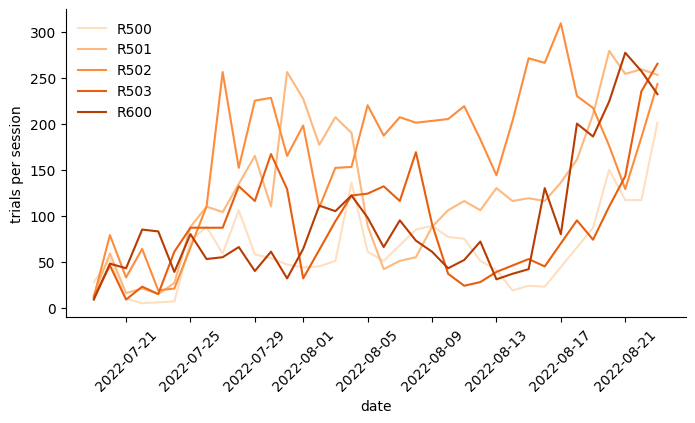

In [297]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(data = df_all.groupby(['animal_id', 'date']).max(),
                x ="date", y="trial", hue="animal_id", palette='Oranges', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "trials per session")
sns.despine()

ax.legend(frameon=False)

#### Hits

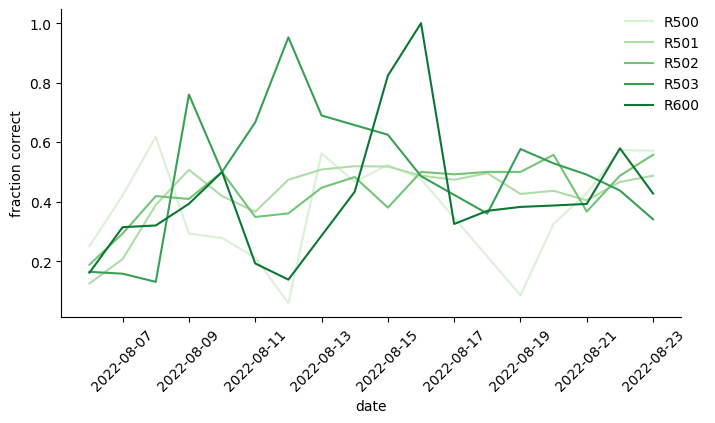

In [295]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

sns.lineplot(data = df_antib.groupby(['animal_id', 'date']).mean(),
                x ="date", y="hits", hue="animal_id", palette='Greens', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction correct")
sns.despine()

ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)


#### Violations

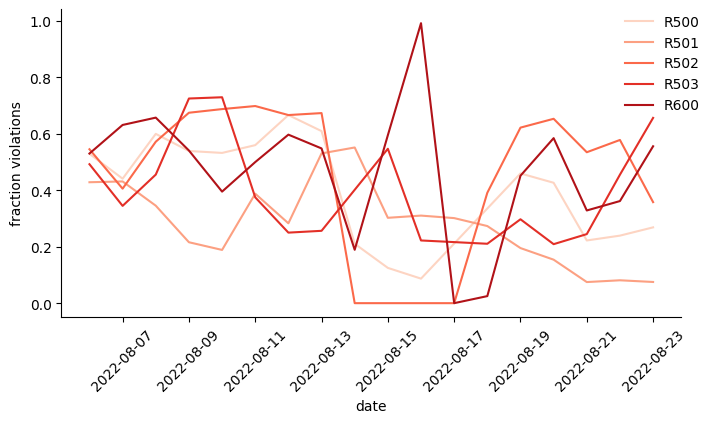

In [296]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

sns.lineplot(data = df_antib.groupby(['animal_id', 'date']).mean(),
                x ="date", y="violations", hue="animal_id", palette='Reds', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction violations")
sns.despine()
ax.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0,frameon=False)

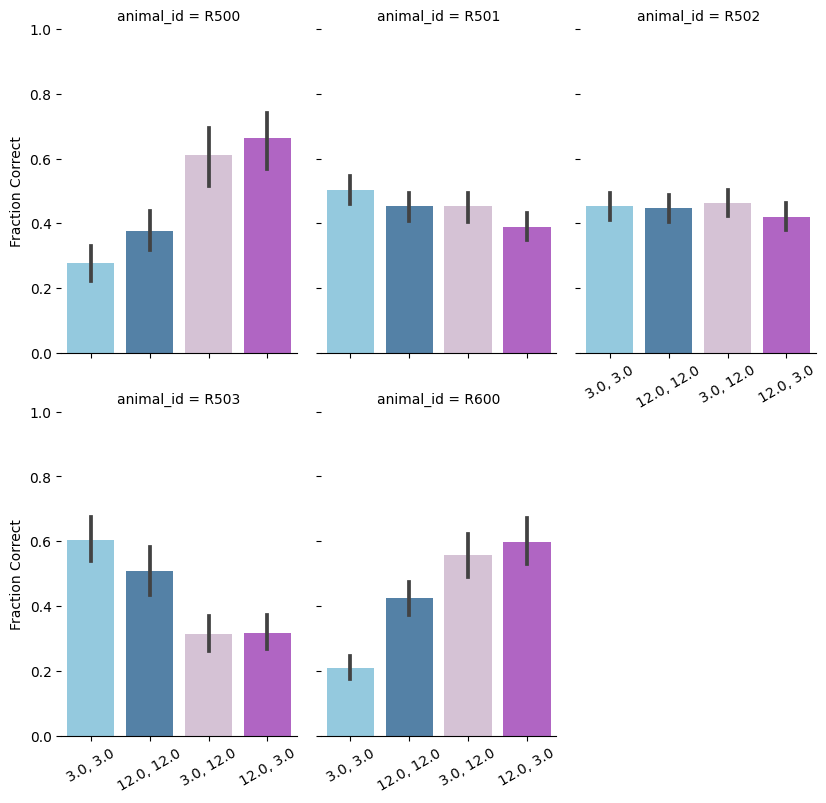

In [314]:
g = sns.catplot(x="sound_pair", y="hits", col="animal_id",
                data=df_antib, kind="bar", col_wrap=3,
                height=4, aspect=.7, 
                order = ["3.0, 3.0", "12.0, 12.0", "3.0, 12.0", "12.0, 3.0"],
                palette=["skyblue", "steelblue", "thistle", "mediumorchid"])

(g.set_xticklabels(rotation=30) 
  .despine(left=True)
  .set(ylim=[0,1])
  .set_axis_labels("", "Fraction Correct"))

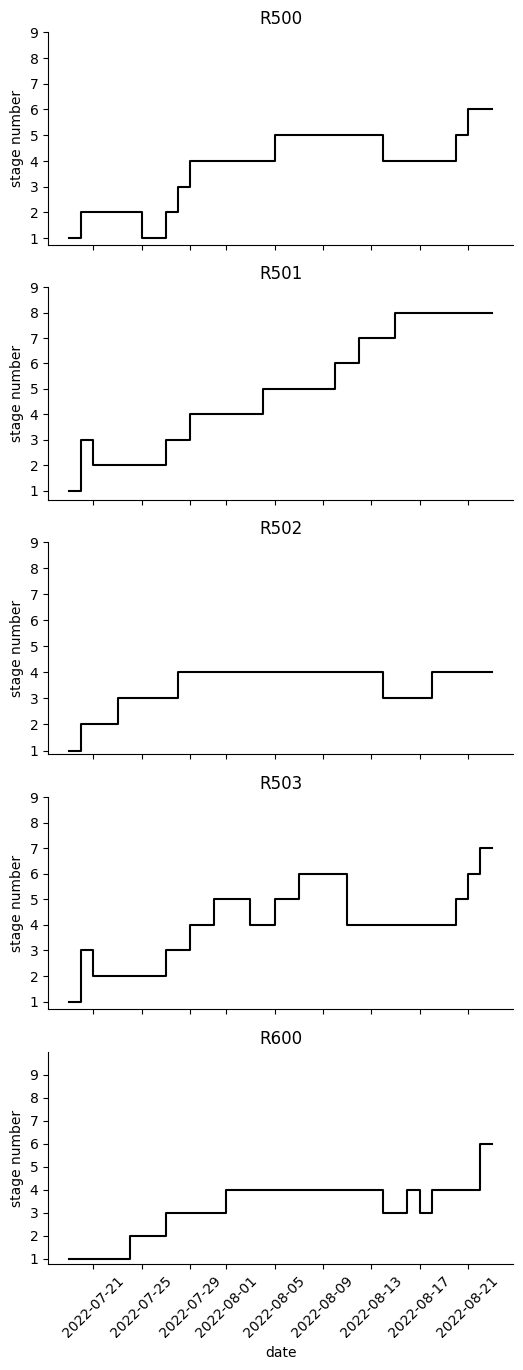

In [334]:
fig,ax = plt.subplots(5, 1, figsize=(6, 16), sharex=True)
counter = 0
for _id, animal_df in df_all.groupby('animal_id'):
    plot_stage(animal_df,ax= ax[counter], title=_id, color="black")
    
    ax[counter].set_ylim
    ax[counter].set_yticks(np.arange(1,9 + 1, 1))
    counter += 1
# plt.yticks(np.arange(1,9 + 1, 1))
